# Effects of Real Estate Attributes on Property Pricing, based on the 2016-2017 NYC Property Sales dataset.

## by Tatiana Tikhonova

## Investigation Overview

In this investigation, I would like to look at the property attributes that could be used to predict their prices, zooming in on the size, class, and location.

## Dataset Overview

The dataset consists of information regarding properties sold in New York City over a 12-month period from September 2016 to September 2017. It contains the location, address, type, sale price, and sale date of building units sold. A number of rows were removed due to them missing values that are crucial to our analysis.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# load in the dataset into a pandas dataframe
k = pd.read_csv('/Users/tatianatikhonova/Documents/udacity/Project4/RealEstateSales/ToGit/wrangled_sales.csv')

# Apartment and Building Sales distribution by Borough

> First, it would be interesting to see how many sales took place in each of the city boroughs. Let's add some granularity and look at different property tax classes: does the Apartment sales distribution differ from the one for Buildings?


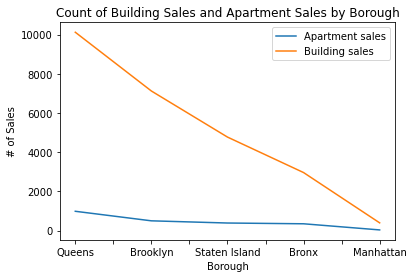

In [4]:
p1 = k[k['Tax Class At Time Of Sale'] ==2].Borough.value_counts().plot(kind='line');
p2 = k[k['Tax Class At Time Of Sale'] !=2].Borough.value_counts().plot(kind='line');
plt.title('Count of Building Sales and Apartment Sales by Borough')
plt.xlabel('Borough')
plt.ylabel('# of Sales')
plt.legend(['Apartment sales','Building sales']);

#We can see that the majority of the 2016-2017 NYC sales occurred in Queens.
#We can also observe a large gap between Apartment and Building Sales.
#Who would have thought that Commercial Buildings are more popular than apartments on the property market?

## Property Sales by Price and Borough

> Now let's check which ones get more expensive. We noticed that the majority of real estate deals were made in Queens, but does that mean that the overall sales value prevails in that borough as well? Take a look at the below slide and find out for yourself!

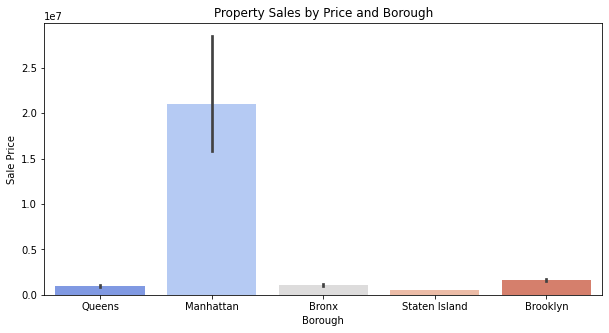

In [6]:
ax = sns.barplot(x="Borough", 
y='Sale Price', 
data=k, 
palette=sns.color_palette('coolwarm', n_colors=5))
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5
plt.title('Property Sales by Price and Borough');

#Surprise! Or not so much. 
#It is obvious that depite being the lowest ranked borough in the matters of sales qty,
#It still leads when it comes to the property cost.

## Average Property Cost by Borough

> Now that we know the accumulated total number and value of sales made in each borough, it would be interesting to see the average. How much does a property cost in, say, Staten Island?

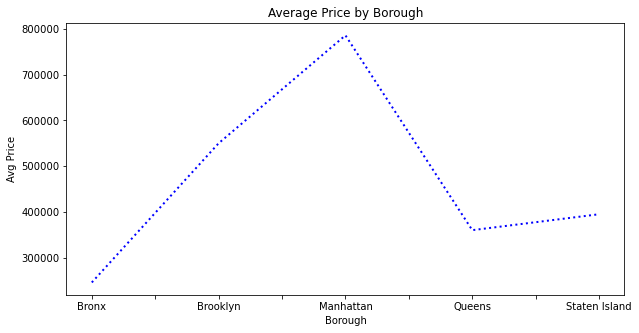

In [5]:
avg_by_borough = round(k.groupby('Borough').mean(),2)
avg_price_per_unit = avg_by_borough['Sale Price'] / avg_by_borough['units']
avg_price_per_unit.plot(kind='line',color='blue', linestyle ='dotted', linewidth=2);

plt.ylabel('Avg Price')
plt.title("Average Price by Borough");

#Seems like a property located on Staten Island on average cost around $400K.
#We do need to keep in mind, though, that our property dataset includes factories and other commerical bldgs.,
#besides residential apartments.

## Average Property Cost by Class

> Since we mentioned that all of these real estate deals include commercial deals, it would be eye opening to discover how much each type costs as compared to others. My guess is that office buildings rank the highest, what is yours? *(P.S. Take note of how Family Dwelling sales cost the lowest – something to remember when looking at the last slide.)*

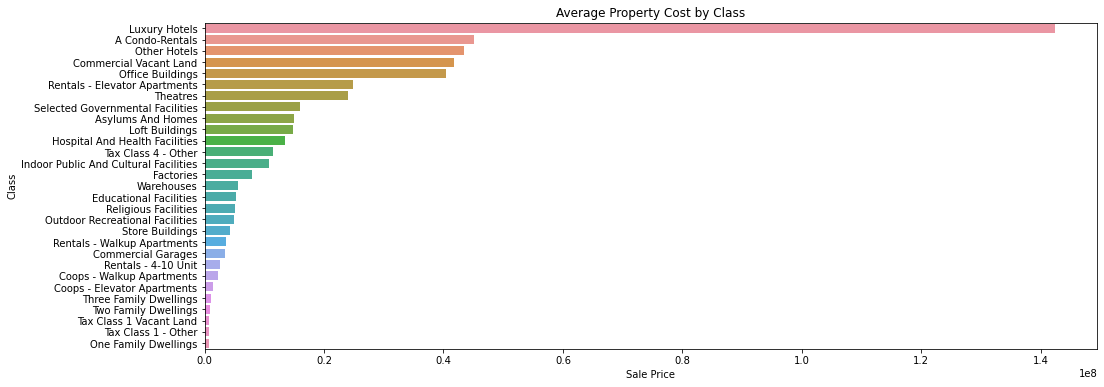

In [7]:
avg_by_class = k.groupby('Class',as_index=False).mean()
avg_by_class.sort_values("Sale Price",ascending=False, inplace=True)
plt.figure(figsize=(16,6))
ax = sns.barplot(x='Sale Price',y='Class', data=avg_by_class,orient='h')
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,10
plt.title("Average Property Cost by Class");


#I was wrong! Luxury Hotels were sold at the highest price during the 2016-2017 given period.
#And it looks like family dwellings turned out to be the cheapest ones.

## Average Apartment Cost

> Let's separate apartments from buildings, and take a look at the former. Which type is on average more expensive, when looking at the 2016-2017 NYC sales?

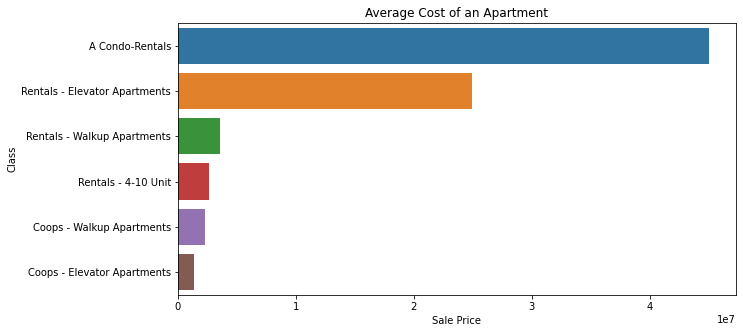

In [7]:
avg_apt_by_class = avg_by_class[avg_by_class['Tax Class At Time Of Sale']==2]
byclass = sns.barplot(x='Sale Price',y='Class',data=avg_apt_by_class,orient='h');
plt.title("Average Cost of an Apartment");
#It was unusual for me to see that walk up rentals on average cost more than condos with an elevator.

## Majority of Sales by Class

> Lastly, I'd like to show you what happens if we look at the total # of sales regardless of its price or location: which type of properties sold the most? Surprisingly, it's...

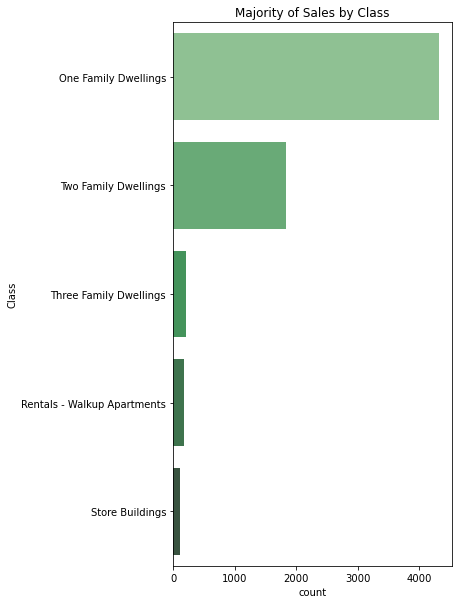

In [8]:
#...family dwellings!
ax = sns.countplot(y="Class",
            data=k[(k['Borough']=='Queens') & 
                   (k['Year Built'].between(1925,1960))],
                   palette="Greens_d",
            order = k['Class'].value_counts().iloc[:5].index);
plt.title("Majority of Sales by Class");

## The End

I hope you enjoyed this little slide show as much as I did. Thanks for checking it out!